In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
original_data=pd.read_csv("Titanic-Dataset.csv")
raw_data=original_data

In [6]:
#going through descriptives for the dataset we get to know Column age has 891-714 missing values
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
raw_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data=raw_data[[ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked']]
data['Sex']=data['Sex'].map({'male':1,'female':0})
data['Embarked']=data['Embarked'].map({"C":0,"S":1,"Q":2})
data=data.dropna()
data

C:\Users\utkar\AppData\Local\Temp\ipykernel_9036\4033651478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=data['Sex'].map({'male':1,'female':0})
C:\Users\utkar\AppData\Local\Temp\ipykernel_9036\4033651478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked']=data['Embarked'].map({"C":0,"S":1,"Q":2})


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,1.0
1,1,1,0,38.0,1,0,0.0
2,1,3,0,26.0,0,0,1.0
3,1,1,0,35.0,1,0,1.0
4,0,3,1,35.0,0,0,1.0
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,2.0
886,0,2,1,27.0,0,0,1.0
887,1,1,0,19.0,0,0,1.0
889,1,1,1,26.0,0,0,0.0


In [9]:
x=data[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked']]
y=data['Survived']

<Axes: xlabel='Pclass', ylabel='count'>

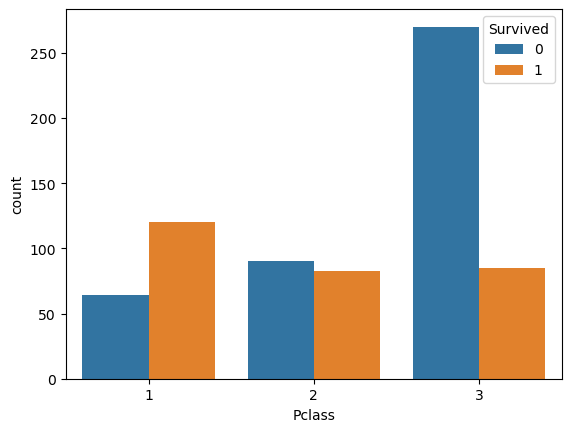

In [20]:

sns.countplot(data=data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Survived']], x='Pclass', hue='Survived')


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=365)

In [26]:
reg=LogisticRegression()
x_test.shape

(214, 6)

In [27]:
print(reg.fit(x_train,y_train))

LogisticRegression()


In [35]:
reg.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [36]:
actual=np.array(y_test)
predicted=np.array(reg.predict(x_test))
cm=confusion_matrix(actual,predicted)
print(cm)

[[115  15]
 [ 26  58]]


In [37]:
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print("Model predicted the values for survival with a success rate of:",accuracy*100)

Model predicted the values for survival with a success rate of: 80.8411214953271
